In [80]:
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from my_ravdess_functions import get_feature_ravdess, get_mean_emotions, get_std_emotions, get_crests_valleys_ravdess

ravdess_path = r'Ravdess\audio_speech_actors_01-24'
emotions_str = ['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust', 'Surprised']
metrics_name = ['Crest', 'Valley', 'Average']

# RAVDESS

In [5]:
def alternate_lists(list1, list2) -> np.ndarray:
	"""Sea una lista1 = [1, 2, 3] y lista2 = [4, 5, 6], con la función se unen las listas alternandose entre ellas, es decir
	resulta en una lista como la siguiente: [1, 4, 2, 5, 3, 6]. Además de eso, toma las primeras dos posiciones y las convierte en una tupla
	para dejar el siguiente resultado: alternate_lists(list1, list2) = [(1, 4), (2, 5), (3, 6)]. lista1 y lista2 deben tener el mismo tamaño"""

	size = len(list1)
	return np.array([(list1[i], list2[i]) for i in range(size)])


In [6]:
men = [[] for _ in range(12)]
women = [[] for _ in range(12)]

for i in range(1, 25):
	actor = f'Actor_{i:02}'
	
	if i%2 != 0:
		pos = (i - 1) // 2
		temp = men
	else:
		pos = i//2 - 1
		temp = women

	# Ahora, si se edita temp, afecta a la lista de la que se le dio el valor anteriormente (estoy aprovechando una curiosidad de Python)
	temp_tuple = get_crests_valleys_ravdess(actor)
	
	crest = alternate_lists(get_mean_emotions(temp_tuple[0]), get_std_emotions(temp_tuple[0]))
	valley = alternate_lists(get_mean_emotions(temp_tuple[1]), get_std_emotions(temp_tuple[1]))
	average = alternate_lists(get_mean_emotions(temp_tuple[2]), get_std_emotions(temp_tuple[2]))

	temp[pos] = [crest, valley, average]

In [ ]:
# Imprimir resultados (HOMBRES) - CRESTAS

print('CRESTS\n\n')

for i, actor in enumerate(men):
	print(f'Actor_{(2*i + 1):02}\n')

	print('Emotion \t Mean \t Std')
	for i, emotions in enumerate(actor[0]):
		if len(emotions_str[i]) < 7:
			print(f'{emotions_str[i]} \t\t {emotions[0]:.3f} \t {emotions[1]:.3f}')
		else:
			print(f'{emotions_str[i]} \t {emotions[0]:.3f} \t {emotions[1]:.3f}')

	print('\n')

In [ ]:
# Imprimir resultados (MUJERES) - CRESTAS

print('CRESTS\n\n')

for i, actor in enumerate(women):
	print(f'Actor_{(2*(i+1)):02}\n')

	print('Emotion \t Mean \t Std')
	for i, emotions in enumerate(actor[0]):
		if len(emotions_str[i]) < 7:
			print(f'{emotions_str[i]} \t\t {emotions[0]:.2f} \t {emotions[1]:.2f}')
		else:
			print(f'{emotions_str[i]} \t {emotions[0]:.2f} \t {emotions[1]:.2f}')

	print('\n')

In [ ]:
actor_dict = {}
metrics_name = ['Cresta', 'Valle', 'Media']

for i in range(1, 25):
	actor = f'Actor_{i:02}'
	
	if i%2:
		pos = (i - 1) // 2
		temp = men
	else:
		pos = i//2 - 1
		temp = women

	temp_dict_metric = {}
	for j, metric in enumerate(temp[pos]):
		temp_dict_emotion = {}
		for k, emotion in enumerate(metric):
			temp_dict_emotion[emotions_str[k]] = emotion
		
		temp_dict_metric[metrics_name[j]] = temp_dict_emotion

	actor_dict[actor] = temp_dict_metric
actor_dict

In [82]:
actors_df = pd.DataFrame(columns=['Actor', 'Sex', 'Metric', 'Emotion', 'Mean', 'Std'])

for i in range(1, 25):
	actor = f'Actor_{i:02}'

	if i%2:
		sex = 'Man'
		pos = (i - 1) // 2
		temp = men
	else:
		sex = 'Woman'
		pos = i//2 - 1
		temp = women

	cont = 0
	for j, metric in enumerate(temp[pos]):
		for k, emotion in enumerate(metric):
			actors_df.loc[24*(i-1) + cont] = [actor, sex, metrics_name[j], emotions_str[k], emotion[0], emotion[1]]
			cont += 1

actors_df

,Actor,Sex,Metric,Emotion,Mean,Std
0,Actor_01,Man,Crest,Neutral,5.219374e-02,8.457080e-03
1,Actor_01,Man,Crest,Calm,3.021553e-02,8.038630e-03
2,Actor_01,Man,Crest,Happy,9.859507e-02,4.403438e-02
3,Actor_01,Man,Crest,Sad,5.744656e-02,2.423779e-02
4,Actor_01,Man,Crest,Angry,4.316432e-01,3.165229e-01
...,...,...,...,...,...,...
571,Actor_24,Woman,Average,Sad,-3.848338e-07,4.673675e-07
572,Actor_24,Woman,Average,Angry,-4.272528e-08,1.473723e-07
573,Actor_24,Woman,Average,Fearful,2.284691e-07,3.059322e-07
574,Actor_24,Woman,Average,Disgust,-3.029055e-07,3.233800e-07


In [78]:
def plot_mean_std(metric: str) -> None:
	fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
	temp = actors_df[actors_df['Metric'] == metric]

	sns.boxplot(temp, x='Emotion', y='Mean', hue='Sex', ax=ax1)
	ax1.set_title(f'{metric} Mean')

	sns.boxplot(temp, x='Emotion', y='Std', hue='Sex', ax=ax2)
	ax2.set_title(f'{metric} Std')

	fig.tight_layout()
	plt.show()

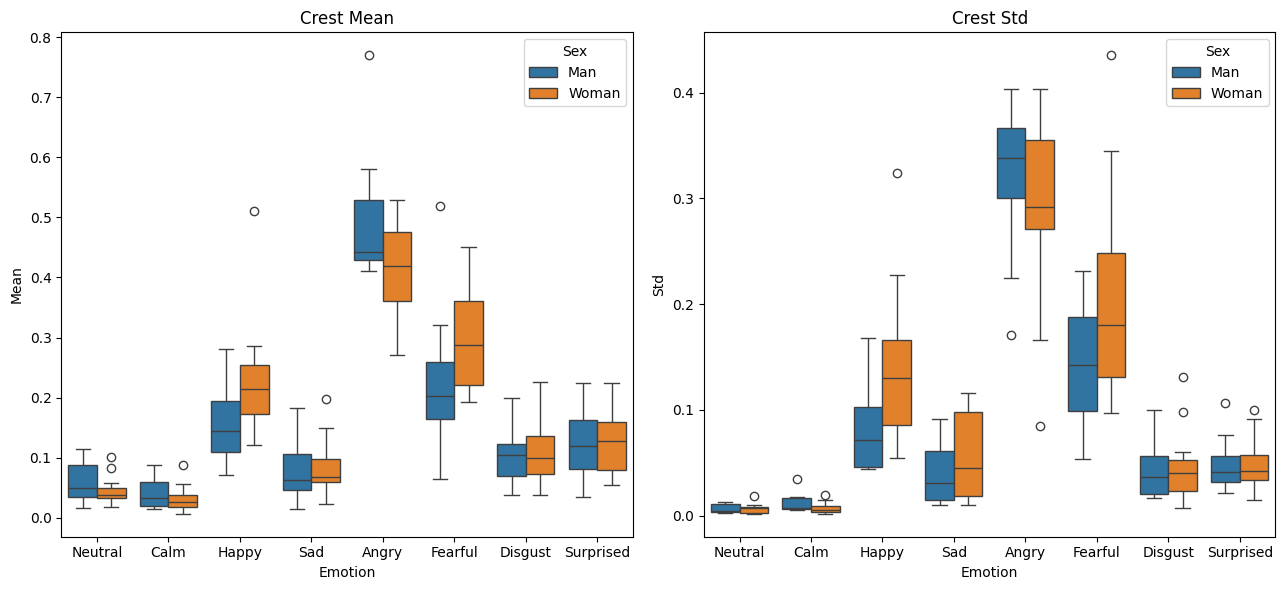

In [83]:
plot_mean_std('Crest')

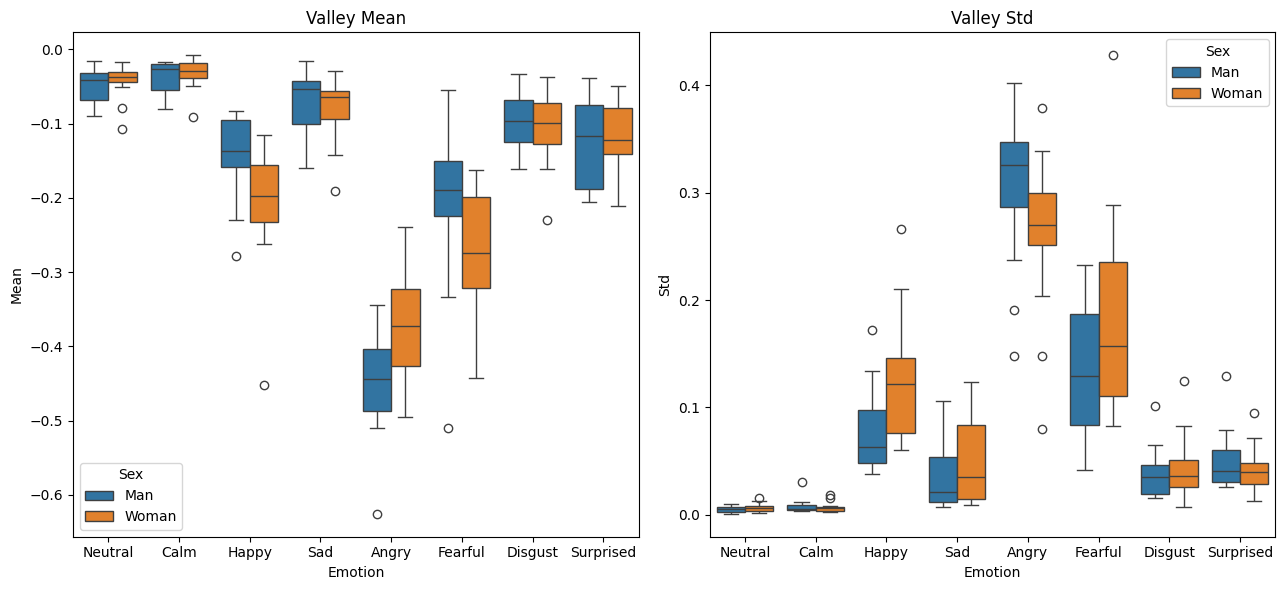

In [84]:
plot_mean_std('Valley')

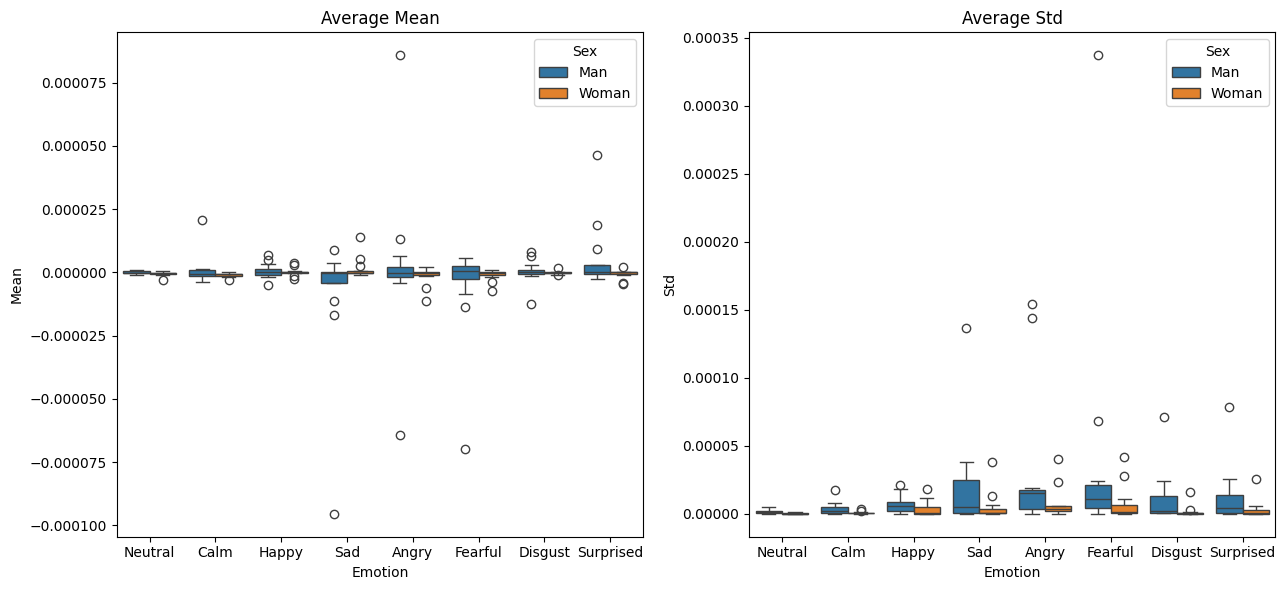

In [85]:
plot_mean_std('Average')

In [56]:
temp = actors_df[actors_df['Metric'] == 'Media']
temp = temp[temp['Sex'] == 'Man']

temp[temp['Mean'] == np.min(temp['Mean'])]

,Actor,Sex,Metric,Emotion,Mean,Std
355,Actor_15,Man,Media,Sad,-0.000095,0.000137


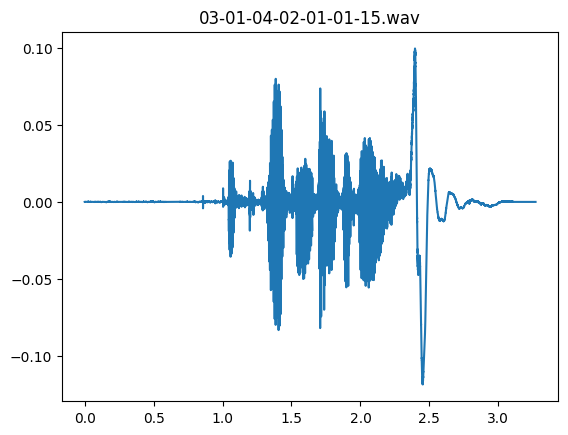

0.09944402

-0.11833279

-0.00035731852

In [59]:
record = '03-01-04-02-01-01-15.wav'
y, sr = librosa.load(fr'Ravdess\audio_speech_actors_01-24\Actor_15\{record}')

# display(y, sr, np.mean(y))

x = np.arange(0, len(y)/sr, 1/sr)

sns.lineplot(
	x=x, y=y
)
plt.title(record)
plt.show()

display(np.max(y), np.min(y), np.mean(y))